<a href="https://colab.research.google.com/github/Dagnne/TalentoTechDag/blob/main/Dagnne_Limpieza_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?


#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")


In [1]:
# Importar librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
ruta = '/content/drive/MyDrive/Analisis de Datos basico Talento Tech/dataset_banco.csv'
data = pd.read_csv(ruta) # La "ruta" se puede definir como ruta o path y los parentesis () no influyen para correr el codigo

#3. Una mirada al dataset
##Librerias

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [ ]:
print(data.shape) # Este comando me muestra los datos del contenido del shape (cantidad de filas y columnas)
data.head()

In [ ]:
# Veamos las variables categoricas y numericas
data.info()

#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.


## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:



In [ ]:
data.dropna(inplace=True) # Que pasa si coloco False en lugar de True
data.info()

##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:



# Ciclo FOR

for col in cols_cat:: Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.



In [ ]:
# Conteo de los niveles en las diferentes columnas categoricas
cols_cat = ['job','marital','education', 'default', 'housing',
            'loan', 'contact','month', 'poutcome', 'y']

for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')

In [7]:
data.describe() # Nos da una descripcion general de nuestra DataFrame como moda, promedio, desviacion estandar, maximo, minimo y porcentaje en cuartiles

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Analisis de la descripcion anterior

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservamos todas las columnas numéricas.

La desviación estándar es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varían los valores individuales de un conjunto de datos con respecto a su valor promedio.

Imagina que tienes un conjunto de datos que representa las alturas de estudiantes en una clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

Entonces, la desviación estándar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviación estándar alta indica que los datos están más dispersos o separados del promedio.


In [16]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = data['pdays'].mean ()  # Cuando no se coloca el parentesis de mean, muestra el promedio de las 4 primeras y 4 ultimas filas

print('Prom_dias_contacto', media)

Prom_dias_contacto 40.17822461123277


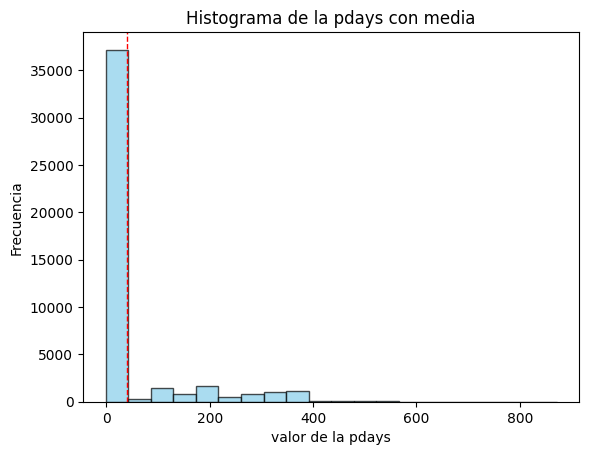

In [21]:
# Graficar un histograma del atributo pdays
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para obtener la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con media')

# Mostrar la grafica
plt.show()

In [22]:
# Calcula la desviacion estandar del atributo "pdays"
std = data['pdays'].std()
print("Desviacion estandar de la pdays:", std) # std = Desviacion estandar segun la nomenclatura del codigo como se ve en el comando df.describe()

Desviacion estandar de la pdays: 100.10328306134589


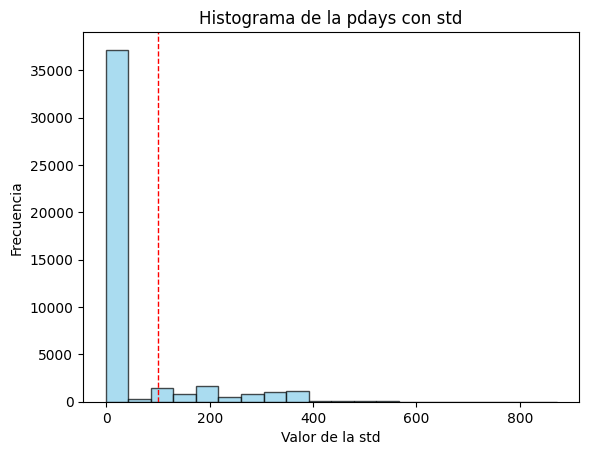

In [27]:
# Graficar un histograma de la std del atriburo pdays
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para obtener la std
plt.axvline(std, color='red', linestyle='dashed', linewidth=1) # Se reemplaza media por std seguido del comando "plt.axvline" para graficar la desviacion estandar y no la media

# Etiquetas y titulo
plt.xlabel('Valor de la std')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con std')

# Mostrar la grafica
plt.show()

In [31]:
# Calcula el valor maximo del atributo "pdays"
max = data['pdays'].max()
print("Valor maximo de la pdays:", max)

Valor maximo de la pdays: 871.0


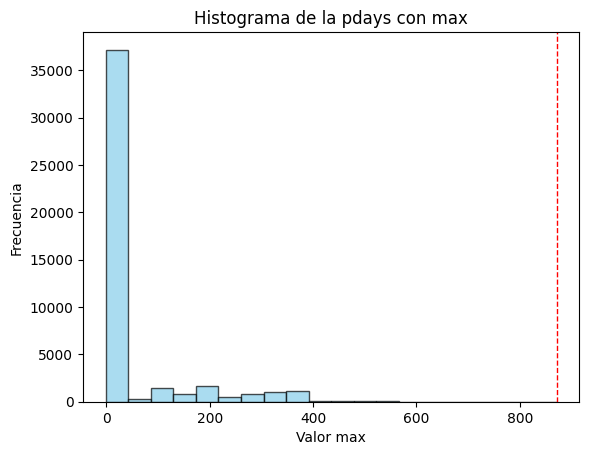

In [32]:
# Histograma valor max del atriburo pdays
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para obtener valor max
plt.axvline(max, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('Valor max')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con max')

# Mostrar la grafica
plt.show()

In [36]:
# Conteo de valores con -1
count = data['pdays'].value_counts()[-1] # Esta linea de codigo sirve para contar la cantidad de valores iguales dentro de un mismo atributo, en este caso cantidad de -1
print(count)

36953


In [33]:
# Calcula el valor minimo del atributo "pdays"
min = data['pdays'].min()
print("Valor minimo de la pdays:", min)

Valor minimo de la pdays: -1.0


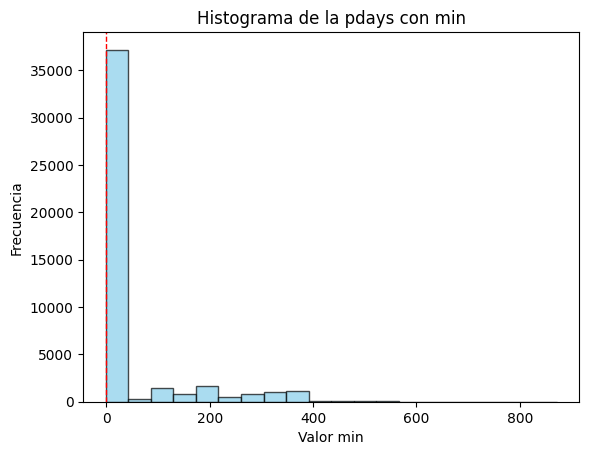

In [34]:
# Histograma valor min del atriburo pdays
plt.hist(data['pdays'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para obtener valor max
plt.axvline(min, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y titulo
plt.xlabel('Valor min')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con min')

# Mostrar la grafica
plt.show()